In [25]:
#Importing libraries required

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
%matplotlib inline
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler() 
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Getting the data 
df= pd.read_csv(r"C:\Users\donga\OneDrive\Documents\avocado.csv" ) 

In [4]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [1]:
# The data contains 18249 rowa and 14 columns

In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
df.shape

(18249, 14)

In [8]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [2]:
# Checking for the datatype and null values in the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [3]:
# Checking the column names

In [10]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [11]:
# checking null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [12]:
# Summary statistics
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [4]:
# Unnamed: 0 is the column for indexing only so removing or deleting itdropping bags size columns also.

In [13]:
# dropping 
df.drop(['Unnamed: 0','XLarge Bags','Small Bags','Total Bags','Large Bags'], axis=1, inplace= True)
df.shape

(18249, 9)

In [14]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,2018.000000


In [15]:
df[["Date", "Month", "Year"]] = df["Date"].str.split("-", expand = True)

In [16]:
# converting objects into integer datatype
df[["Date", "Month", "Year"]]=df[["Year", "Month", "Date"]].astype(int)

In [17]:
df.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Year
0,27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany,12,2015
1,20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany,12,2015
2,13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany,12,2015
3,6,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany,12,2015
4,29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany,11,2015


In [18]:
df['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

In [1]:
# Dropping one of the year column

In [19]:
df.drop(['year'],axis=1, inplace=True)

In [20]:
df['type'].nunique()

2

In [21]:
df.drop(['type'],axis=1, inplace=True)

In [22]:
df['region'].nunique()

54

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   region        18249 non-null  object 
 7   Month         18249 non-null  int32  
 8   Year          18249 non-null  int32  
dtypes: float64(5), int32(3), object(1)
memory usage: 1.0+ MB


In [2]:
# Checking the correlation

In [26]:
corr=df.corr()
corr

,Date,AveragePrice,Total Volume,4046,4225,4770,Month,Year
Date,1.000000,0.027386,-0.009747,-0.010159,-0.012393,-0.009009,0.010621,0.004475
AveragePrice,0.027386,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,0.162409,0.093197
Total Volume,-0.009747,-0.192752,1.000000,0.977863,0.974181,0.872202,-0.024689,0.017193
4046,-0.010159,-0.208317,0.977863,1.000000,0.926110,0.833389,-0.025803,0.003353
4225,-0.012393,-0.172928,0.974181,0.926110,1.000000,0.887855,-0.022108,-0.009559
4770,-0.009009,-0.179446,0.872202,0.833389,0.887855,1.000000,-0.033424,-0.036531
Month,0.010621,0.162409,-0.024689,-0.025803,-0.022108,-0.033424,1.000000,-0.177050
Year,0.004475,0.093197,0.017193,0.003353,-0.009559,-0.036531,-0.177050,1.000000


<AxesSubplot:>

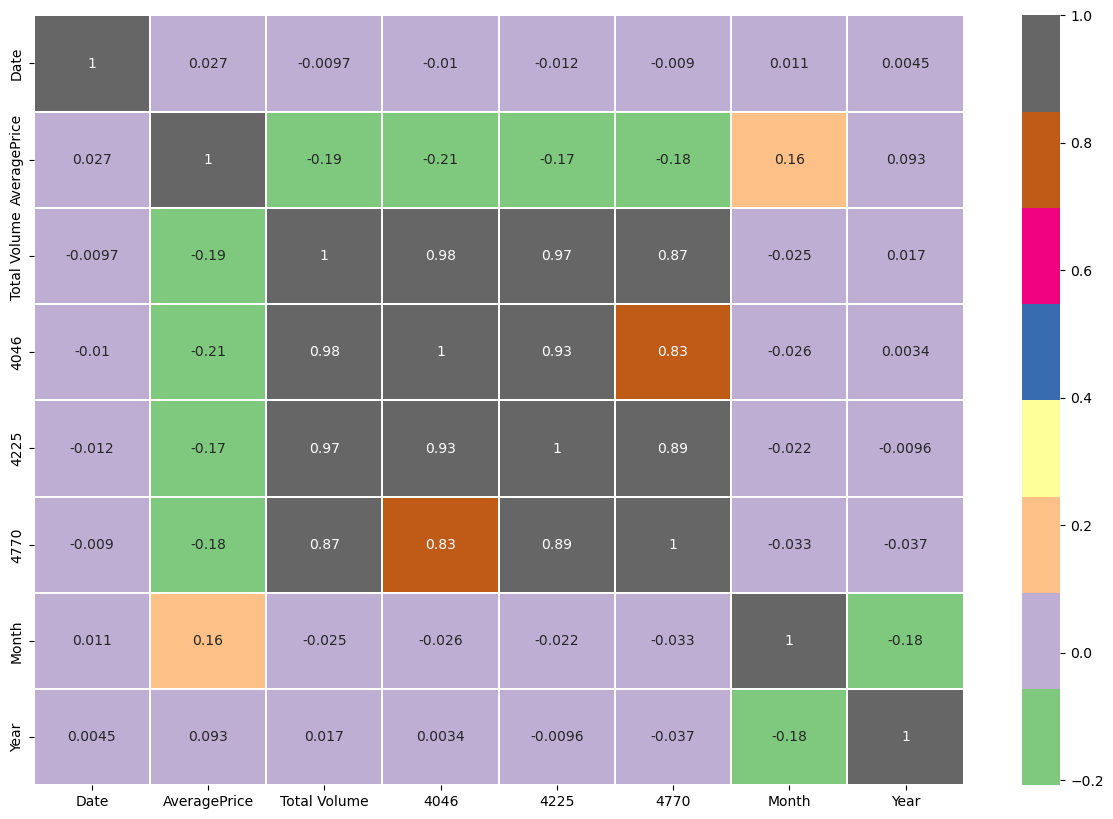

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap="Accent", annot=True, linewidth=0.3)

In [3]:
# There is a high correlation 

<Figure size 1500x1000 with 0 Axes>

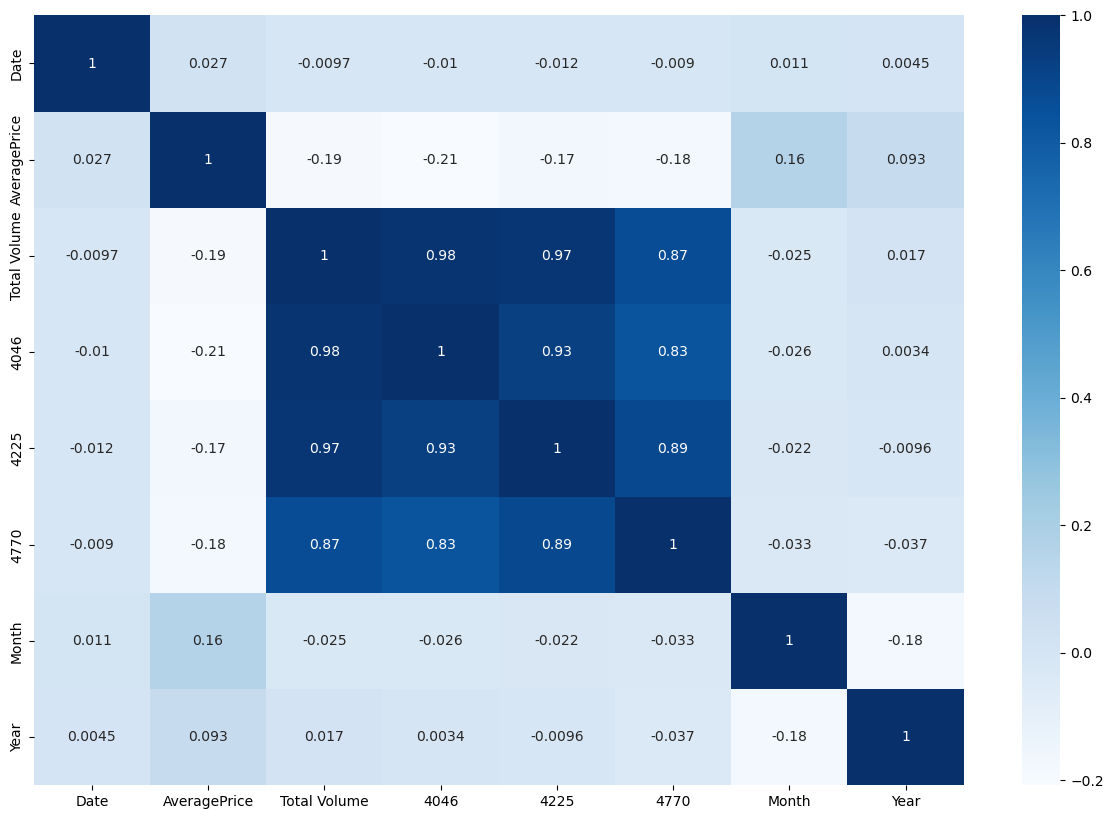

<Figure size 1500x1000 with 0 Axes>

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,cmap='Blues',annot=True)
plt.figure(figsize=(15,10))

In [4]:
# In the above chart we can seee a high correlation

<AxesSubplot:>

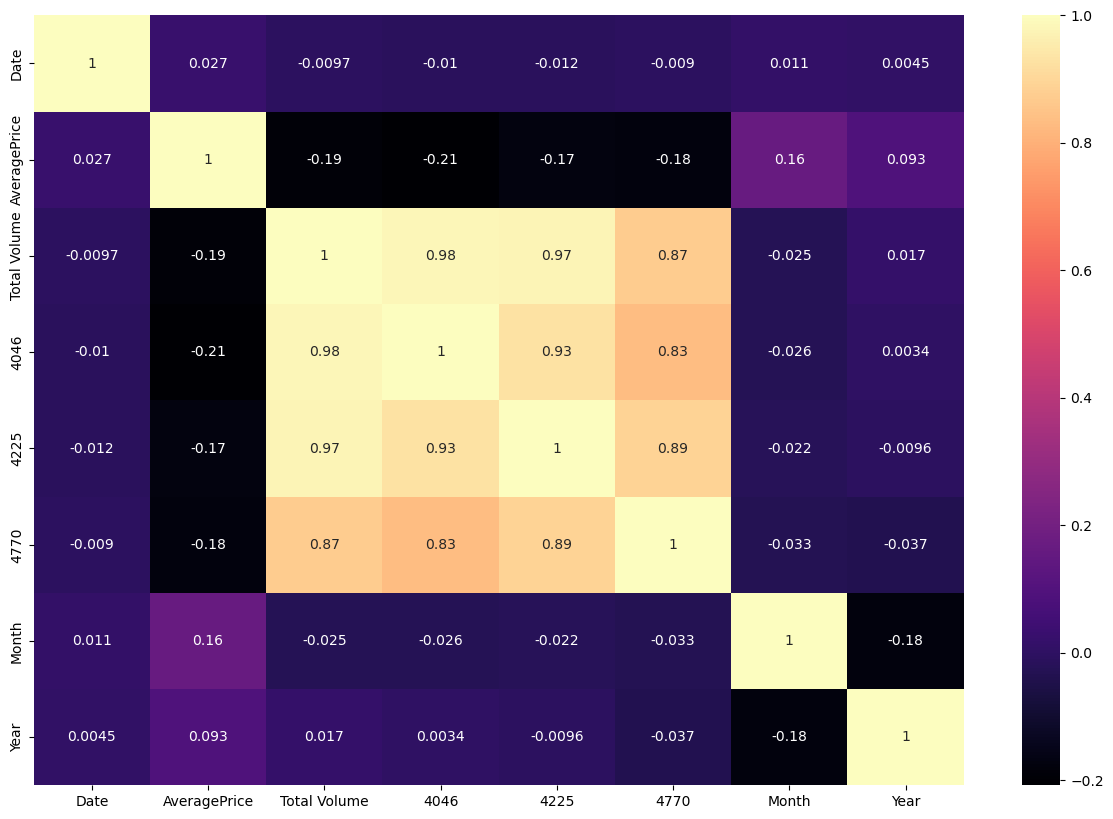

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,cmap='magma',annot=True)

In [5]:
# The above chart a very light correlation.

<AxesSubplot:>

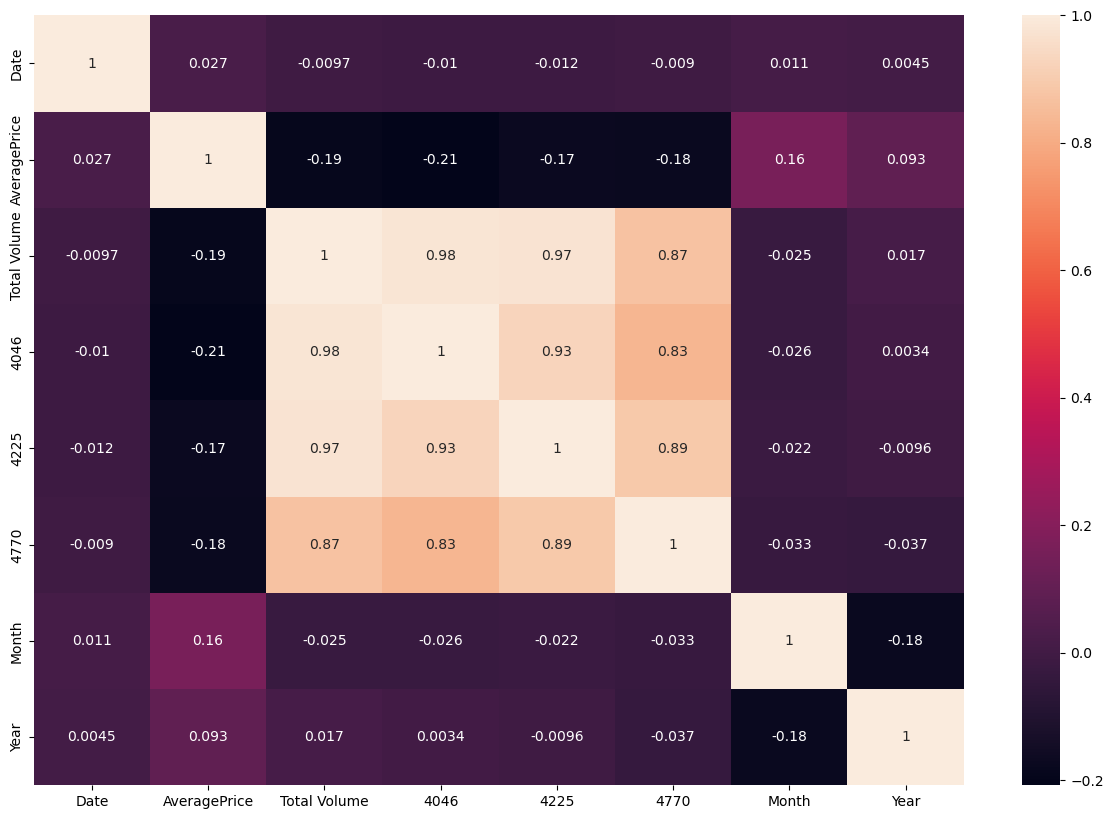

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [6]:
# The above chart shows a light correlation.

<AxesSubplot:xlabel='Date', ylabel='Count'>

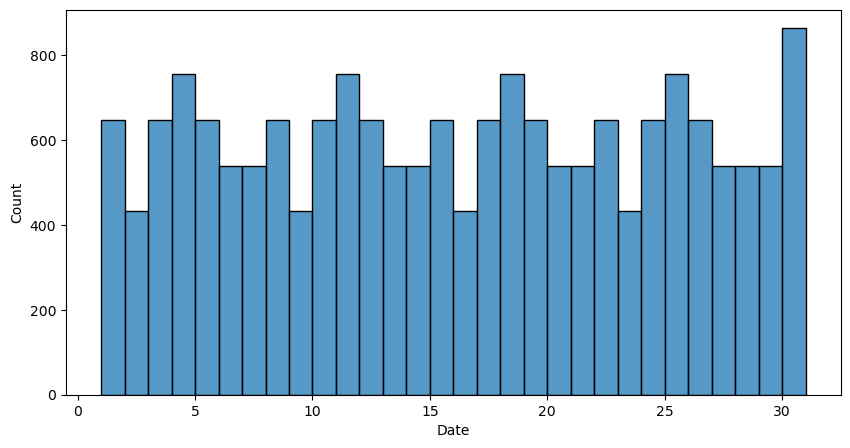

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(df['Date'], bins=30)

In [7]:
# The average maximum sales everyday if 400 to 600. 

<AxesSubplot:xlabel='Month', ylabel='Count'>

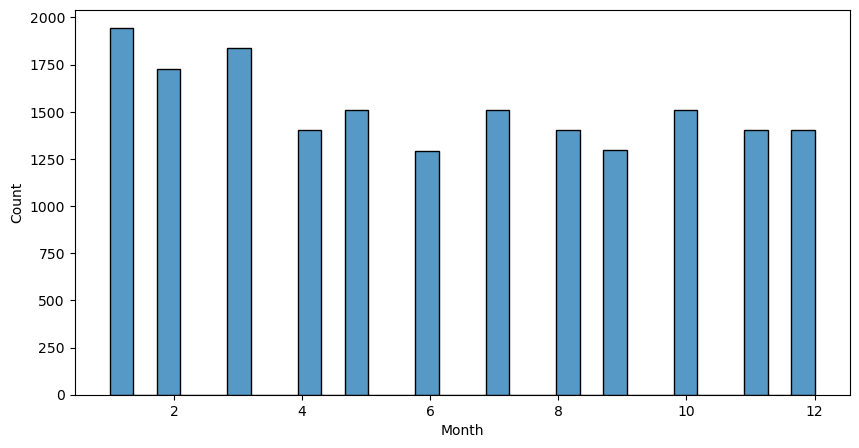

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(df['Month'], bins=30)

In [8]:
# Around 1250 to 1500 Avocado  are sold eveymonth.

<AxesSubplot:xlabel='Year', ylabel='Count'>

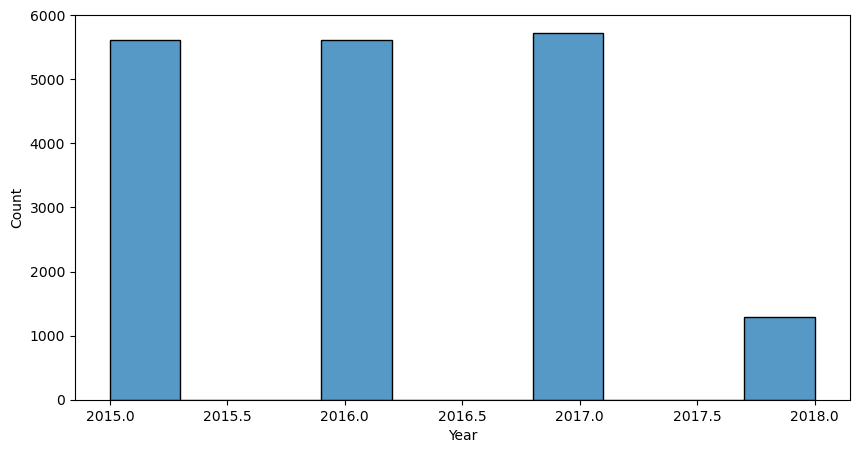

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(df['Year'], bins=10)

In [9]:
# Maximum number of Avocado were sold in the Year 2017

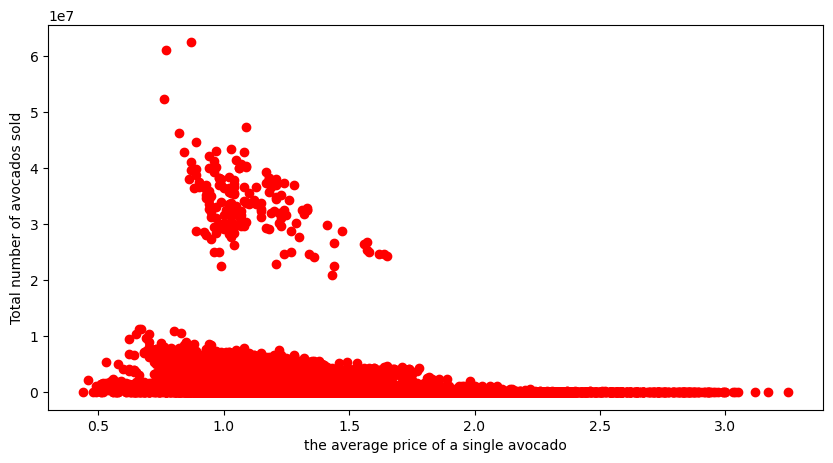

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(df['AveragePrice'],df['Total Volume'],c='Red')
plt.xlabel('the average price of a single avocado')
plt.ylabel('Total number of avocados sold')
plt.show()

In [10]:
# MAximum Average price is around 0.5 to 1.7

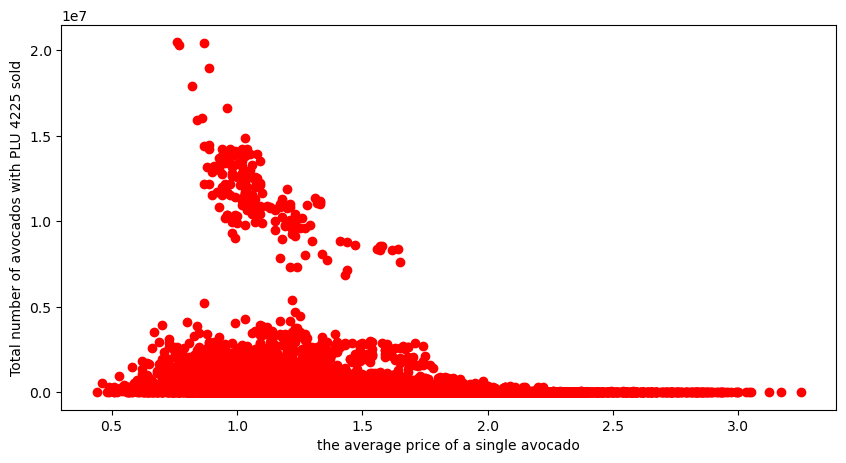

In [36]:
plt.figure(figsize=(10,5))
plt.scatter(df['AveragePrice'],df['4225'],c='Red')
plt.xlabel('the average price of a single avocado')
plt.ylabel('Total number of avocados with PLU 4225 sold')
plt.show()

In [11]:
# In the above chart aslo the maximunm average price is around 0.5 to 1.8

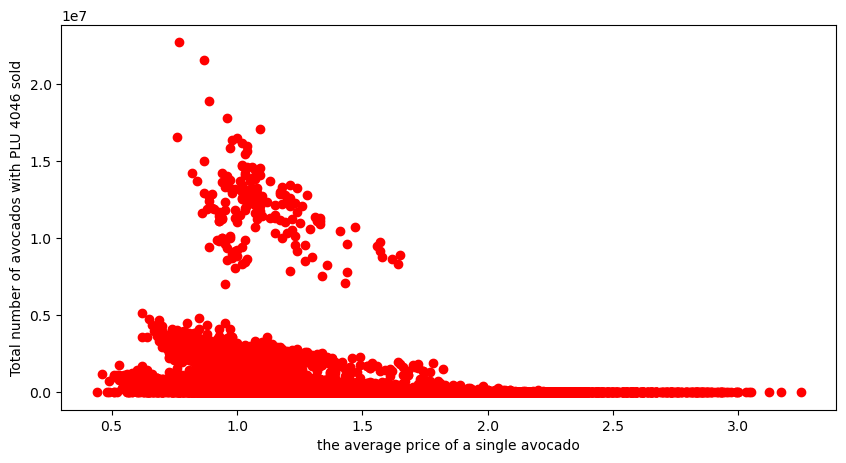

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(df['AveragePrice'],df['4046'],c='Red')
plt.xlabel('the average price of a single avocado')
plt.ylabel('Total number of avocados with PLU 4046 sold')
plt.show()

In [12]:
# MAximum Average price is around 0.5 to 1.7

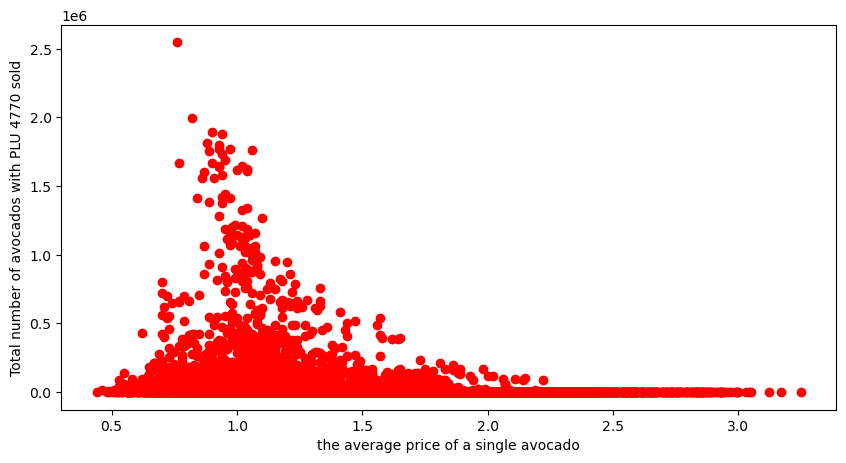

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(df['AveragePrice'],df['4770'],c='Red')
plt.xlabel('the average price of a single avocado')
plt.ylabel('Total number of avocados with PLU 4770 sold')
plt.show()

In [13]:
# In the above chart aslo the maximunm average price is around 0.5 to 2.0

In [14]:
# LabelEncoder for converting categorical data to numerical data

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   region        18249 non-null  object 
 7   Month         18249 non-null  int32  
 8   Year          18249 non-null  int32  
dtypes: float64(5), int32(3), object(1)
memory usage: 1.0+ MB


In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['region']=le.fit_transform(df['region'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   region        18249 non-null  int32  
 7   Month         18249 non-null  int32  
 8   Year          18249 non-null  int32  
dtypes: float64(5), int32(4)
memory usage: 998.1 KB


In [46]:
df.dtypes

Date              int32
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
region            int32
Month             int32
Year              int32
dtype: object

In [15]:
# Checking for Outliers

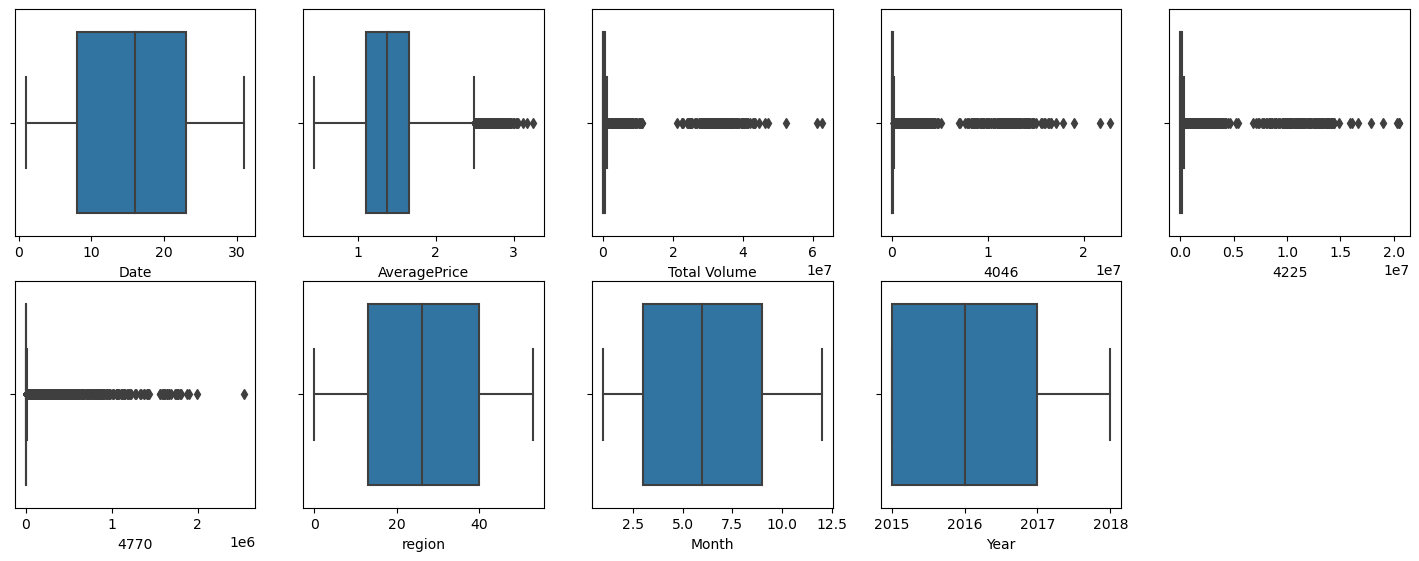

In [47]:
plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(3,5,o[0]+1)
    sns.boxplot(df[o[1]])

In [16]:
# From the above plot we can see that there is a oulliers in 'AveragePrice','TotalVolume','4046','4225','4770'.so, now we will remove the outliers

In [17]:
#Removing Outliers

In [48]:
#zscore

from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([  346,   359,   783,   787,   788,   790,   791,   792,   794,
         795,   796,   797,   799,   803,   805,   807,   808,   809,
         812,   816,   820,   823,   827,  1334,  1347,  1516,  1518,
        1541,  2340,  2341,  2348,  2351,  2368,  2370,  2652,  2652,
        2652,  2652,  2653,  2653,  2653,  2653,  2654,  2654,  2654,
        2654,  2655,  2655,  2655,  2655,  2656,  2656,  2656,  2656,
        2657,  2657,  2657,  2657,  2658,  2658,  2658,  2658,  2659,
        2659,  2659,  2659,  2660,  2660,  2660,  2660,  2661,  2661,
        2661,  2661,  2662,  2662,  2662,  2662,  2663,  2663,  2663,
        2663,  2664,  2664,  2664,  2664,  2665,  2665,  2665,  2665,
        2666,  2666,  2666,  2666,  2667,  2667,  2667,  2667,  2668,
        2668,  2668,  2668,  2669,  2669,  2669,  2669,  2670,  2670,
        2670,  2670,  2671,  2671,  2671,  2671,  2672,  2672,  2672,
        2672,  2673,  2673,  2673,  2673,  2674,  2674,  2674,  2674,
        2675,  2675

In [58]:
df_new=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_new.shape)

with outliers:: (18249, 9)
After removing outliers:: (17838, 9)


In [18]:
# Using IQR Method

In [59]:
#IQR
from scipy import stats 
IQR = stats.iqr(df) 
IQR

6601.1

In [60]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [61]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(11810, 9)


In [19]:
# findings IQR method have removed more outliers as compare to zscore method

In [62]:
df=df_out

In [63]:
df.shape

(11810, 9)

In [20]:
# Handling Skewness 

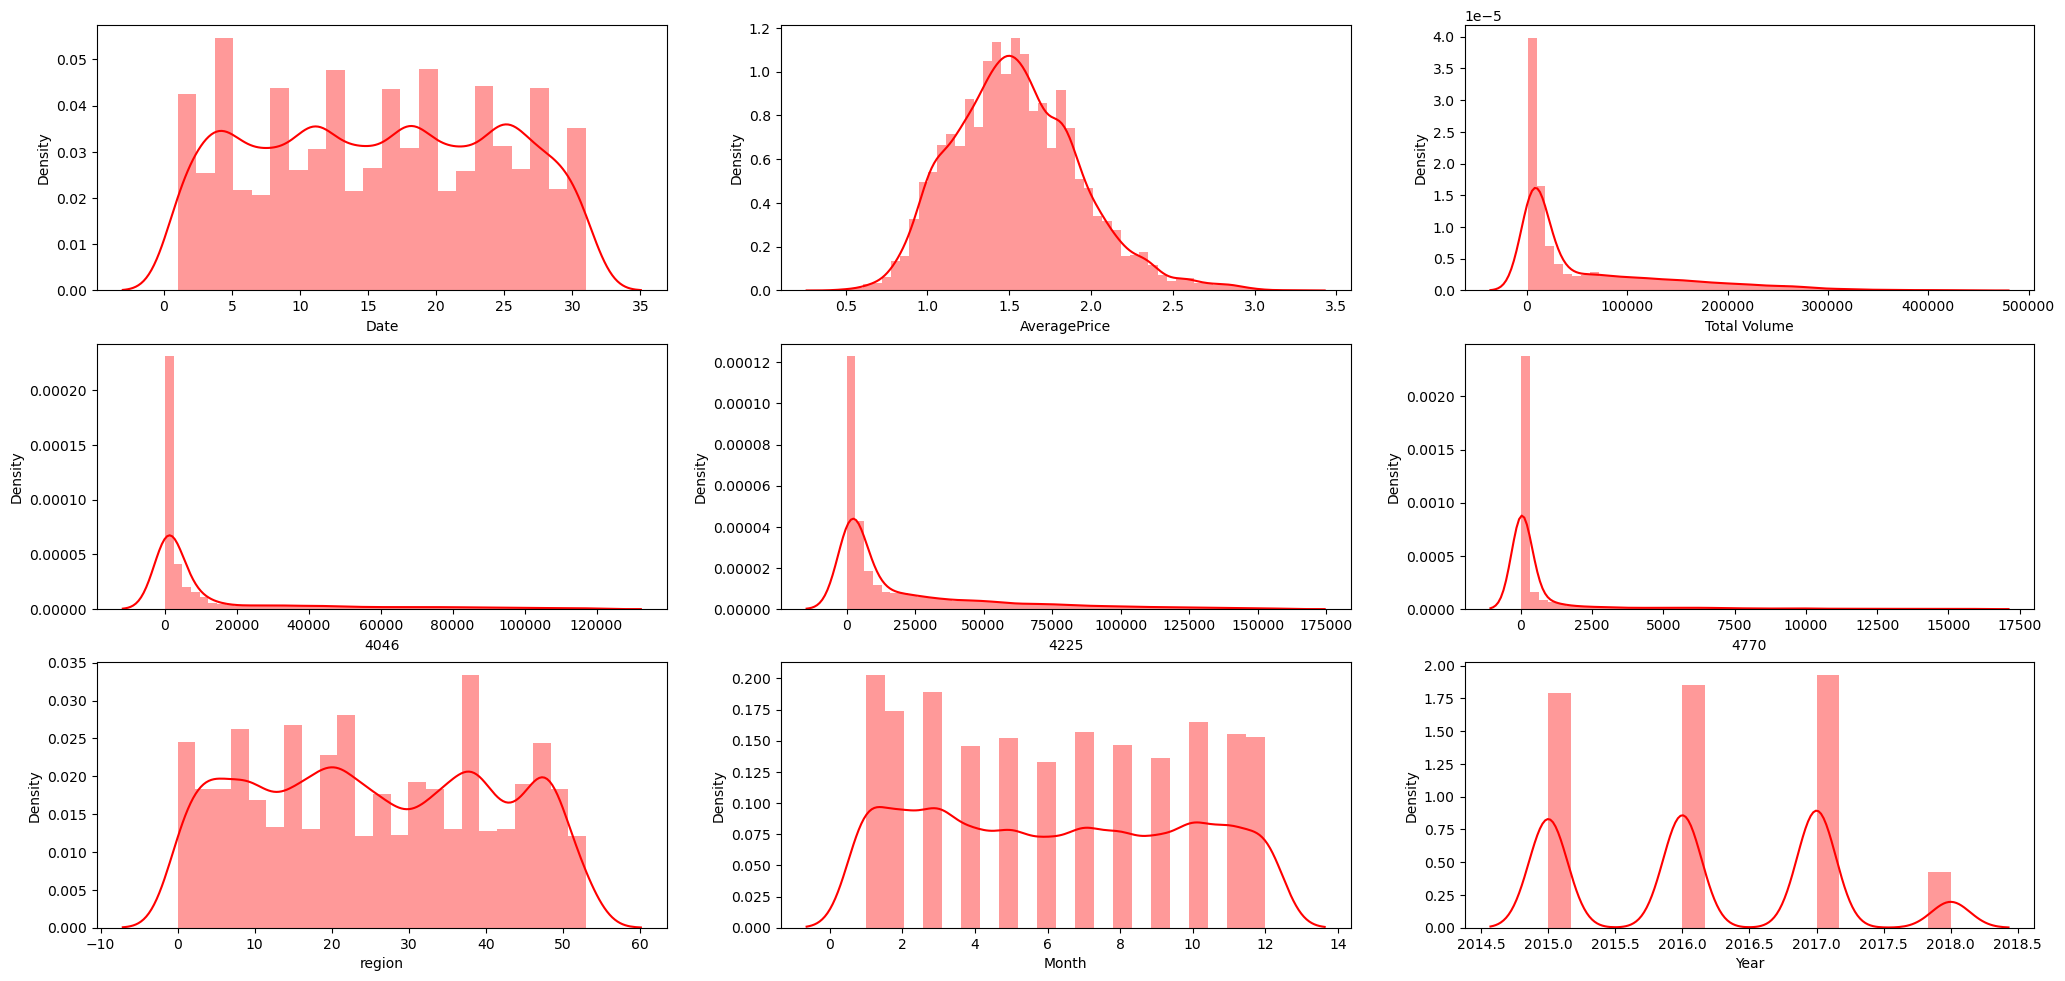

In [64]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(5,3,i[0]+1)
    sns.distplot(df[i[1]],color='r')

In [65]:
df.skew()

Date            0.001974
AveragePrice    0.485192
Total Volume    1.584367
4046            2.305573
4225            1.931259
4770            3.779422
region          0.037788
Month           0.074589
Year            0.185516
dtype: float64

In [21]:
# From the grap and info we can see that there is a skewness in TotalVolume,4046,4225,4770.The skewness more than+/- 0.5 will we treated

In [66]:
# Removing Skewness

from sklearn.preprocessing import power_transform

df[['Total Volume','4046','4225','4770']]=power_transform(df[['Total Volume','4046','4225','4770']],method='yeo-johnson')

In [67]:
df.skew()

Date            0.001974
AveragePrice    0.485192
Total Volume    0.001730
4046           -0.039709
4225           -0.084397
4770            0.264709
region          0.037788
Month           0.074589
Year            0.185516
dtype: float64

In [22]:
# Skewness is removed from all columns

In [68]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']

In [69]:
x.shape

(11810, 8)

In [70]:
y.shape

(11810,)

In [24]:
#Scaling X Values

In [71]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [72]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7
count,11810.000000,11810.000000,11810.000000,11810.000000,11810.000000,11810.000000,11810.000000,11810.000000
mean,0.491942,0.519967,0.542762,0.554013,0.370257,0.483322,0.477885,0.388400
std,0.291943,0.253642,0.240620,0.227285,0.376204,0.291989,0.323404,0.312164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.318560,0.379299,0.397389,0.000000,0.226415,0.181818,0.000000
50%,0.500000,0.490245,0.531795,0.534280,0.323441,0.471698,0.454545,0.333333
75%,0.766667,0.759429,0.710244,0.743943,0.739383,0.735849,0.727273,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
x.shape

(11810, 8)

In [25]:
# The data has been scalled

In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [26]:
# CHECKING THE BEST RANDOM STATE FOR DATA SPLIT

In [75]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.31627446695031813
At random state 0, The test accuracy is: 0.31110743933693275


At random state 1, The training accuracy is: 0.3137606864190571
At random state 1, The test accuracy is: 0.322160366295671


At random state 2, The training accuracy is: 0.31104550613263937
At random state 2, The test accuracy is: 0.3325401388159551


At random state 3, The training accuracy is: 0.3140851924526462
At random state 3, The test accuracy is: 0.3204819018678169


At random state 4, The training accuracy is: 0.31393103507530695
At random state 4, The test accuracy is: 0.3212664466396692


At random state 5, The training accuracy is: 0.30978554332569797
At random state 5, The test accuracy is: 0.3386147639965801


At random state 6, The training accuracy is: 0.31034845710998493
At random state 6, The test accuracy is: 0.33520283233100534


At random state 7, The training accuracy is: 0.31904958480956125
At random state 7, The test accuracy is: 0.3005

At random state 72, The training accuracy is: 0.30976988181645315
At random state 72, The test accuracy is: 0.33675833843922043


At random state 73, The training accuracy is: 0.3117528267548719
At random state 73, The test accuracy is: 0.32942046852044027


At random state 74, The training accuracy is: 0.31774171419265673
At random state 74, The test accuracy is: 0.30562927685017705


At random state 75, The training accuracy is: 0.3172314586696694
At random state 75, The test accuracy is: 0.3089516720850629


At random state 76, The training accuracy is: 0.3135188669042789
At random state 76, The test accuracy is: 0.3222487761844708


At random state 77, The training accuracy is: 0.3133113473523923
At random state 77, The test accuracy is: 0.32407522918354725


At random state 78, The training accuracy is: 0.3119704671054734
At random state 78, The test accuracy is: 0.3289386632599127


At random state 79, The training accuracy is: 0.31380864223188154
At random state 79, The test acc

In [ ]:
# SPLITTING THE DATA WITH RANDOM STATE =42

In [76]:
#splitting the data into 78% training and 22% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=42)

In [77]:
x_train.shape

(9211, 8)

In [78]:
y_train.shape

(9211,)

In [79]:
x_test.shape

(2599, 8)

In [80]:
y_test.shape

(2599,)

In [27]:
# Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.31628782464591654


In [82]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 0.1015134204945498
MAE: 0.2517247337665176
r2_score: -1.1209155081150604


In [28]:
# Ridge

In [83]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.3162390091039521


In [84]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 0.10148869080373343
MAE: 0.25167071564428845
r2_score: -1.1545119658984682


In [29]:
#SVR--SVR(kernel='linear')

In [85]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.30956973147853495


In [86]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 0.10158213714957265
MAE: 0.2486247599743541
r2_score: -1.2004538824835325


In [30]:
# SVR(kernel='poly')

In [87]:
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.4465905083201608


In [88]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

MSE: 0.08403775124814229
MAE: 0.22161368844713267
r2_score: -0.4125210591998667


In [31]:
# SVR(kernel='rbf')

In [89]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.6437598455277296


In [90]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))

MSE: 0.056335657121121194
MAE: 0.17446718326435873
r2_score: 0.2861057834772811


In [32]:
# RandomForestRegressor

In [91]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9784409033259489


In [92]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 0.022189511342824163
MAE: 0.1078824163139669
r2_score: 0.7847914370403201


In [33]:
# DecisionTreeRegressor

In [93]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [94]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 0.04634836475567526
MAE: 0.14460176991150442
r2_score: 0.670501975954119


In [34]:
# GradientBoostingRegressor

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.6728753543886403


In [96]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 0.05109791158164065
MAE: 0.17201407077779546
r2_score: 0.2362053348337514


In [35]:
# Cross validation

In [97]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 0.114893, 0.031674
R    : 0.114927, 0.031710
svr    : 0.117054, 0.037944
svr_p    : 0.121506, 0.029041
svr_r    : 0.104346, 0.030228
RF    : 0.083028, 0.027806
DTR    : 0.170172, 0.041488
GBR    : 0.075018, 0.025404


In [36]:
# Accourding to all metrics score selecting the RandomForestRegressor as final model

In [37]:
# GridSearchCV--With RandomForestRegressor

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
RF=RandomForestRegressor()
param={
     'criterion':['mse','mae'],
    'n_estimators':[100, 200],
    'max_depth':[1],
   'max_features' : ["sqrt", "log2",],
}

In [100]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [101]:
RF_grid.fit(x_train,y_train)
RF_grid_pred=RF_grid.best_estimator_.predict(x_test)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


In [102]:
RF_grid.best_params_

{'criterion': 'mse',
 'max_depth': 1,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [103]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 0.022189511342824163
MAE: 0.1078824163139669
r2_score: 0.7847914370403201


In [38]:
# There is no chnage in r2_score after tuning the model.

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

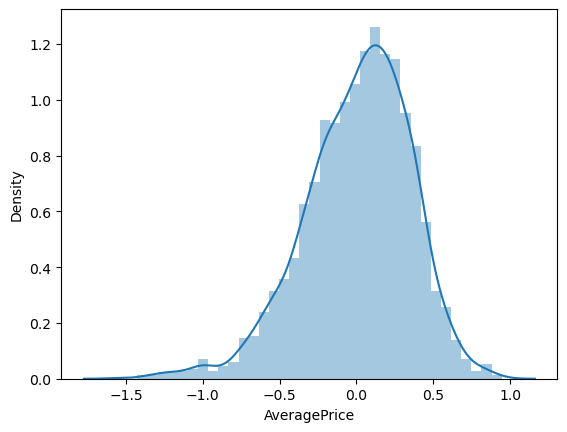

In [104]:
sns.distplot(RF_grid_pred-y_test)

In [40]:
# Choosing a RandomForestRegressor is a best model

In [106]:
import joblib

In [107]:
joblib.dump(RF_grid.best_estimator_,'Avocado_Prediction_Project.obj')

['Avocado_Prediction_Project.obj']

In [108]:
model=joblib.load('Avocado_Prediction_Project.obj')

In [109]:
model.predict(x_test)

array([1.62691233, 1.62378431, 1.36046647, ..., 1.55563596, 1.60900936,
       1.45190281])